<a href="https://colab.research.google.com/github/CristianMts/Escola-DNC/blob/main/RID146016_Desafio07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Etapa 01 - Análise exploratória dos dados


In [112]:
# Lendo o dataset
df = pd.read_csv('/content/data.csv', encoding='ISO-8859-1')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [113]:
#Resumo estatístico para verificar dados numéricos
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


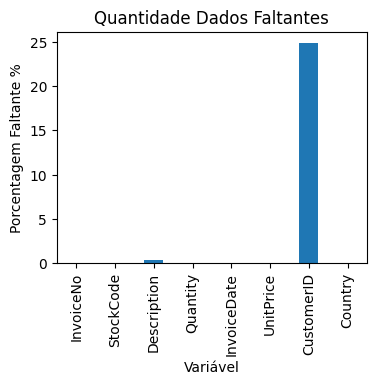

In [115]:
# Verificar valores nulos
(df.isnull().mean()*100).plot.bar(figsize=(4,3))
plt.ylabel('Porcentagem Faltante %')
plt.xlabel('Variável')
plt.title('Quantidade Dados Faltantes')
df.isnull().sum()

In [116]:
df[df.duplicated(keep=False)].sort_values('Description')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
483390,577503,72800B,4 PURPLE FLOCK DINNER CANDLES,1,11/20/2011 12:34,2.55,18110.0,United Kingdom
483414,577503,72800B,4 PURPLE FLOCK DINNER CANDLES,1,11/20/2011 12:34,2.55,18110.0,United Kingdom
160498,550459,72800B,4 PURPLE FLOCK DINNER CANDLES,1,4/18/2011 13:17,2.55,18116.0,United Kingdom
160509,550459,72800B,4 PURPLE FLOCK DINNER CANDLES,1,4/18/2011 13:17,2.55,18116.0,United Kingdom
460074,575895,23345,DOLLY GIRL BEAKER,1,11/11/2011 14:50,1.25,17052.0,United Kingdom
...,...,...,...,...,...,...,...,...
113550,545980,84836,ZINC METAL HEART DECORATION,2,3/8/2011 12:49,1.25,14730.0,United Kingdom
468873,576559,23151,ZINC SWEETHEART SOAP DISH,1,11/15/2011 13:19,2.49,14711.0,United Kingdom
468850,576559,23151,ZINC SWEETHEART SOAP DISH,1,11/15/2011 13:19,2.49,14711.0,United Kingdom
104362,545166,84832,ZINC WILLIE WINKIE CANDLE STICK,1,2/28/2011 14:03,0.85,17027.0,United Kingdom


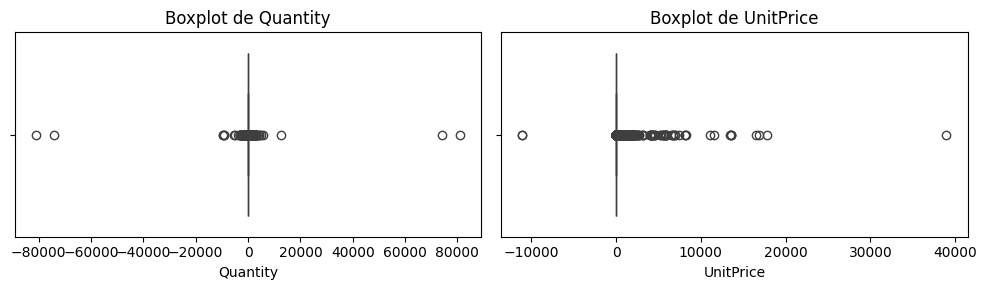

In [117]:
# Boxplot para detectar outliers
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot de Quantity')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['UnitPrice'])
plt.title('Boxplot de UnitPrice')

plt.tight_layout()
plt.show()

## Etapa 02 - Pré-processamento dos dados

In [118]:
#Drop linhas Nulas da Coluna 'CustomerID'
df.dropna(axis=0, subset='CustomerID', inplace=True)

In [119]:
df.drop(df.query('UnitPrice <= 0').index, axis=0, inplace=True)
df.drop(df.query('Quantity <= 0').index, axis=0, inplace=True)

In [120]:
# Removendo registros duplicados
df.drop_duplicates(inplace=True)
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [125]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [126]:
# Alterando o tipo de dados
df = df.astype({'InvoiceDate': 'datetime64[ns]', 'CustomerID': 'int64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 24.0+ MB


In [128]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
392687,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
392688,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
392689,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
392690,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [130]:
# Eliminando outliers
df.drop(df.query('Quantity > 10000').index, axis=0, inplace=True)
df.drop(df.query('UnitPrice > 5000').index, axis=0, inplace=True)

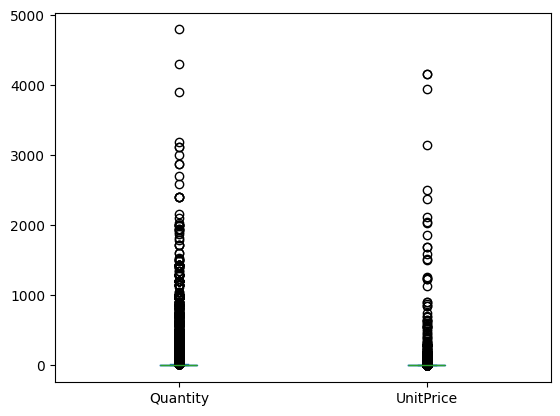

In [131]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df[['Quantity', 'UnitPrice']].plot.box();

In [132]:
# Criando Feature (Coluna Adicional)
df['Total'] = df['Quantity'] * df['UnitPrice']
df[['Quantity', 'UnitPrice', 'Total']].describe().style.format('{:.2f}')

,Quantity,UnitPrice,Total
count,392689.00,392689.00,392689.00
mean,12.72,3.11,21.99
std,43.08,18.06,95.90
min,1.00,0.00,0.00
25%,2.00,1.25,4.95
50%,6.00,1.95,12.45
75%,12.00,3.75,19.80
max,4800.00,4161.06,38970.00


In [134]:
lastdate = df['InvoiceDate'].max()
lastdate

Timestamp('2011-12-09 12:50:00')